In [208]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Load Dataset

In [209]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


# Data Exploratory

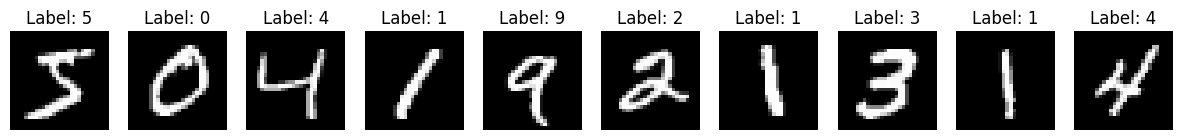

In [210]:
num_images = 10

plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

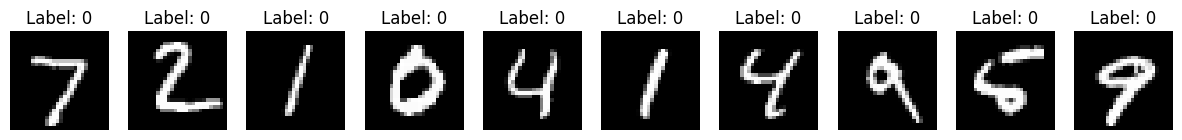

In [211]:
num_images = 10
plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Label: {np.argmax(y_test[i])}")
    plt.axis("off")

plt.show()

/tmp/ipython-input-2601944254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


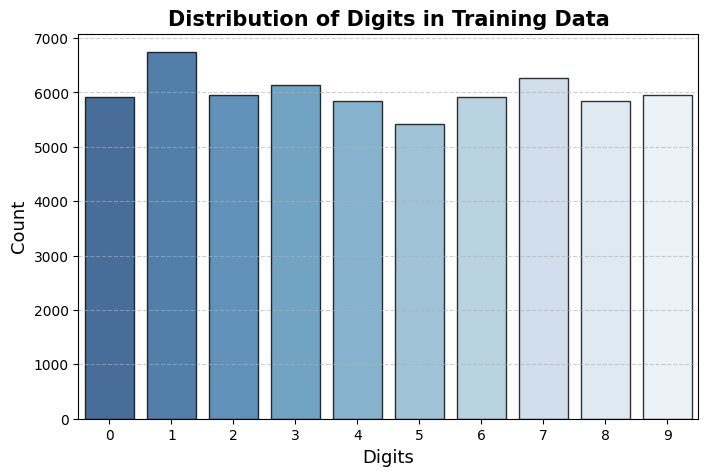

In [212]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8,5))
sns.barplot(
    x=unique,
    y=counts,

    palette="Blues_r",
    alpha=0.8,
    edgecolor="black"
)

plt.xlabel("Digits", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.title("Distribution of Digits in Training Data", fontsize=15, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Data Preprocessing

## Normalization

In [213]:
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Data Modeling

In [214]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [215]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


## Data Augmentation

In [216]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)


In [217]:
batch_size = 64
epochs = 30

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = datagen.flow(X_test, y_test, batch_size=batch_size)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.7399 - loss: 0.7930 - val_accuracy: 0.9597 - val_loss: 0.1262
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9415 - loss: 0.1904 - val_accuracy: 0.9747 - val_loss: 0.0798
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9574 - loss: 0.1446 - val_accuracy: 0.9835 - val_loss: 0.0532
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9662 - loss: 0.1148 - val_accuracy: 0.9836 - val_loss: 0.0494
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9686 - loss: 0.1032 - val_accuracy: 0.9872 - val_loss: 0.0415
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9734 - loss: 0.0871 - val_accuracy: 0.9862 - val_loss: 0.0425
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9767 - loss: 0.0801 - val_accuracy: 0.9868 - val_loss: 0.0402
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9762 - loss: 0.0770 - val_accurac

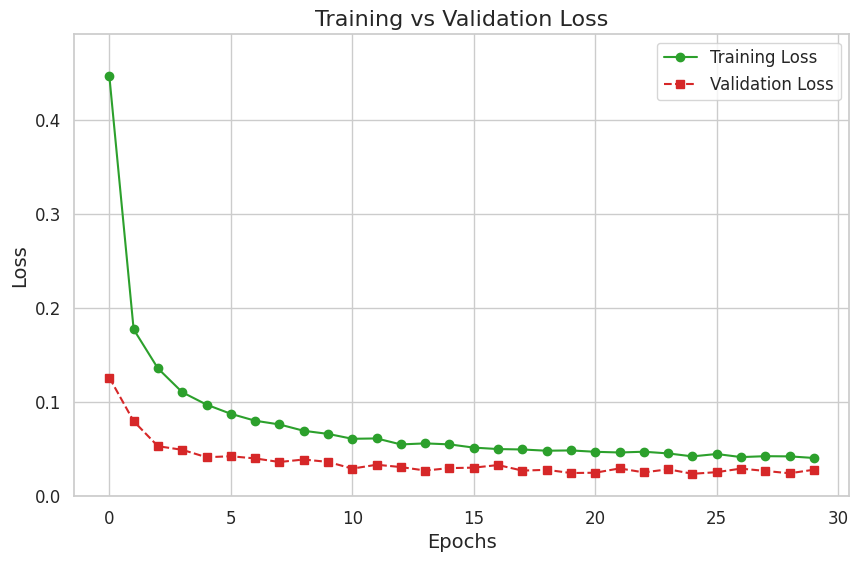

In [230]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], marker='o', linestyle='-', color='#2ca02c', label='Training Loss')
plt.plot(history.history['val_loss'], marker='s', linestyle='--', color='#d62728', label='Validation Loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training vs Validation Loss', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss']))*1.1)
plt.legend(fontsize=12)
plt.show()

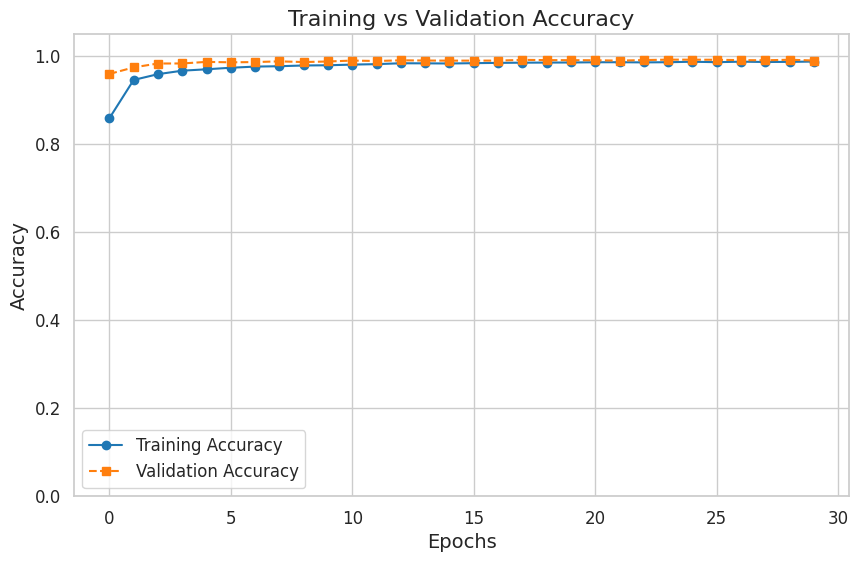

In [229]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='#1f77b4', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='s', linestyle='--', color='#ff7f0e', label='Validation Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training vs Validation Accuracy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,1.05)
plt.legend(fontsize=12)
plt.show()

In [220]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9934 - loss: 0.0210
Test Accuracy: 0.9940, Test Loss: 0.0188


In [221]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [222]:
model.layers

[<Conv2D name=conv2d_21, built=True>,
 <MaxPooling2D name=max_pooling2d_21, built=True>,
 <Conv2D name=conv2d_22, built=True>,
 <MaxPooling2D name=max_pooling2d_22, built=True>,
 <Flatten name=flatten_12, built=True>,
 <Dense name=dense_27, built=True>,
 <Dropout name=dropout_10, built=True>,
 <Dense name=dense_28, built=True>]

# Model Validation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


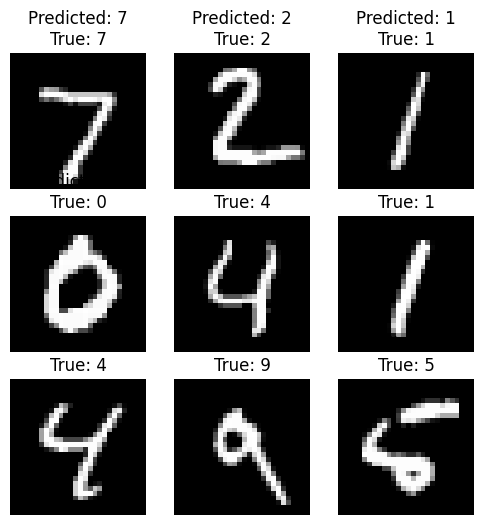

In [223]:
preds = model.predict(X_test[:9])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {pred_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()

In [224]:
model.save("mnist_cnn_augmented.h5")

In [225]:
from google.colab import files
files.download("mnist_cnn_augmented.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [228]:
!pip install tensorflow